# Modelling

In [81]:
import pandas as pd
import numpy as np
import datetime
import time

%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

In [82]:
fulldata = pd.read_csv("../data/data_input_for_model.csv")
fulldata.drop('Unnamed: 0', axis=1, inplace=True)

# lets remove 2012, as it is the first year, it has no "had_violation_lastyear"
fulldata = fulldata[fulldata.year > 2012]

fulldata.head().T

,1,2,3,4,5
pwsid,CT0010024,CT0010024,CT0010024,CT0010024,CT0010024
pws_name,ANDOVER TOWN HALL & FIRE DEPARTMENT,ANDOVER TOWN HALL & FIRE DEPARTMENT,ANDOVER TOWN HALL & FIRE DEPARTMENT,ANDOVER TOWN HALL & FIRE DEPARTMENT,ANDOVER TOWN HALL & FIRE DEPARTMENT
primacy_agency_code,CT,CT,CT,CT,CT
pws_type_code,TNCWS,TNCWS,TNCWS,TNCWS,TNCWS
gw_sw_code,GW,GW,GW,GW,GW
owner_type_code,P,P,P,P,P
population_served_count,25,25,25,25,25
primary_source_code,GW,GW,GW,GW,GW
is_wholesaler_ind,N,N,N,N,N
is_school_or_daycare_ind,N,N,N,N,N


In [83]:
# select features for modelling
features = ['primacy_agency_code', 'pws_type_code',
           'gw_sw_code', 'owner_type_code', 'population_served_count',
           'primary_source_code', 'is_wholesaler_ind', 'is_school_or_daycare_ind',
           'service_connections_count', 'source_water_protection_code',
           'year', 
            'had_violation_lastyear', 
            'had_violation']
data = fulldata[features]

In [78]:
# get dummies:
# (on the contrary to R, this is needed in python as it is not done automatically when modelling)
data = pd.get_dummies(data)

Only three variables seem to have a some correlation with the outcome *source_water_protection_code*, *pws_type_code* and especially *had_violation_lastyear*.

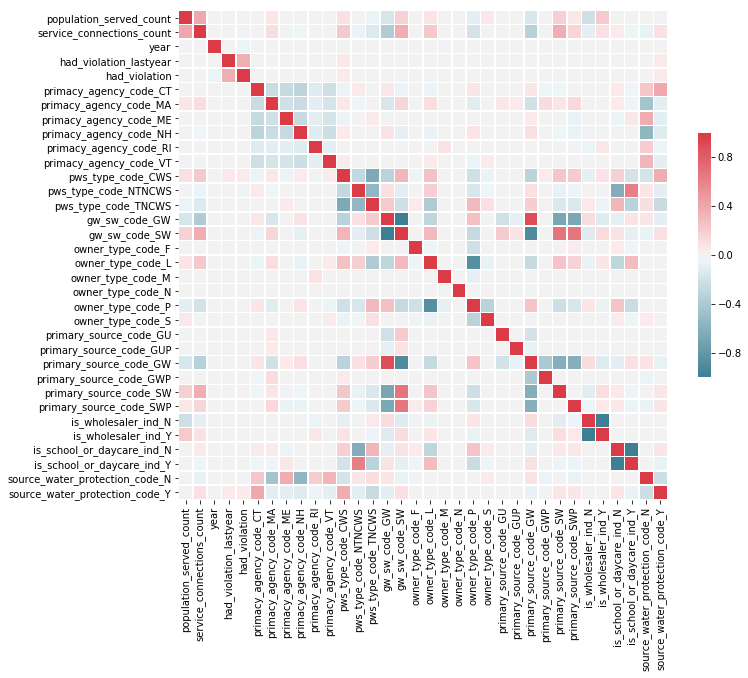

In [69]:
corr = data.corr() 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

We use the years 2013 to 2016 as train set, the year 2017 as validation set and the year 2018 as test set.

In [70]:
# SPLITTING IN TRAIN AND TEST:

# let's train to test data on 2013-2017 and predict 2017:
data_train = data[data.year < 2017] # 2013, 2014, 2015, 2016
data_valid = data[data.year == 2017] # 2017
data_test = data[data.year > 2017] # 2018

X_train = data_train.drop('had_violation', axis=1)
X_valid = data_valid.drop('had_violation', axis=1)
X_test = data_test.drop('had_violation', axis=1)

y_train = data_train.had_violation
y_valid = data_valid.had_violation
y_test = data_test.had_violation


In [41]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [42]:
# look at coefficients
np.abs(log_reg.coef_)

array([[4.34105916e-06, 1.25468194e-05, 8.47924867e-04, 2.33519354e+00,
        8.51139531e-02, 1.11603917e-01, 8.08526389e-02, 1.93908495e-02,
        1.98212905e-01, 2.02892367e-01, 2.30133839e-01, 1.78621928e-02,
        1.19640431e-01, 4.41985699e-01, 6.32346229e-01, 4.31622791e-01,
        2.29492714e-01, 6.16857434e-02, 9.94908364e-01, 2.12547960e-01,
        3.30720588e-02, 7.25777237e-01, 7.45358171e-01, 5.90300445e-01,
        1.48314746e-01, 4.73781408e-01, 1.78145755e-01, 1.16977948e-01,
        2.43467329e-02, 4.47139829e-02, 4.79172321e-02, 1.40376947e-01,
        5.29249781e-01]])

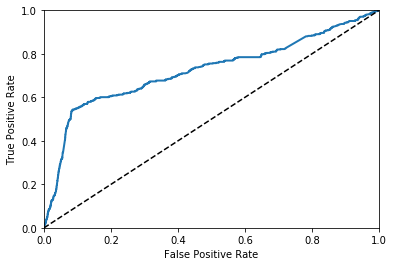

In [43]:
y_scores = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [44]:
roc_auc_score(y_test, y_scores)


0.7221050585071233

In [46]:
# accuracy on train set:
log_reg.fit(X_train, y_train)
print('accuracy on train set: ' + str(log_reg.score(X_train, y_train)))
print('')
# accuracy on validation set:
log_reg.fit(X_valid, y_valid)
print('accuracy on valid set: ' + str(log_reg.score(X_valid, y_valid)))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy on train set: 0.8495131729667812

accuracy on valid set: 0.870561282932417


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# TO DO

* evaluate log_reg, incl. importance of different features
* try other models, e.g. gradient boosting
* needed instead of accuracy: confusion matrix. What do I want to optimize? ==> false negative
* deal with class imbalance
* need some normalization?